In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [11]:
temp_df = pd.DataFrame(session.query(Measurement.date, Measurement.tobs))
temp_df

,date,tobs
0,2010-01-01,65.0
1,2010-01-02,63.0
2,2010-01-03,74.0
3,2010-01-04,76.0
4,2010-01-06,73.0
...,...,...
19545,2017-08-19,71.0
19546,2017-08-20,78.0
19547,2017-08-21,76.0
19548,2017-08-22,76.0


In [17]:
temp_df2010 = temp_df.set_index('date').filter(like='2010', axis=0)
temp_df2011 = temp_df.set_index('date').filter(like='2011', axis=0)
temp_df2012 = temp_df.set_index('date').filter(like='2012', axis=0)
temp_df2013 = temp_df.set_index('date').filter(like='2013', axis=0)
temp_df2014 = temp_df.set_index('date').filter(like='2014', axis=0)
temp_df2015 = temp_df.set_index('date').filter(like='2015', axis=0)
temp_df2016 = temp_df.set_index('date').filter(like='2016', axis=0)
temp_df2017 = temp_df.set_index('date').filter(like='2017', axis=0)


In [ ]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set

In [35]:
tmin_2010 = calc_temps('2016-01-01', '2016-12-31')[0][0]
tavg_2010 = calc_temps('2016-01-01', '2016-12-31')[0][1]
tmax_2010 = calc_temps('2016-01-01', '2016-12-31')[0][2]
print(f"Minimum temperature: {tmin_2010},\n"
      f"Average temperature: {round(tavg_2010, 1)},\n"
      f"Maximum temperature: {tmax_2010}."
     )

Minimum temperature: 56.0,
Average temperature: 74.1,
Maximum temperature: 84.0.


Text(0, 0.5, 'Temperature (°F)')

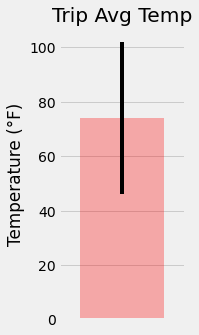

In [36]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(2,5))
plt.bar(0, tavg_2010, width=0.4, color='r', alpha=0.3)
plt.errorbar(0, tavg_2010, yerr = tmax_2010 - tmin_2010, color='k')
plt.title('Trip Avg Temp')
plt.xticks([])
plt.xlim(-0.3, 0.3)
plt.ylabel('Temperature (°F)')

### Daily Rainfall Average

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


### Daily Temperature Normals

In [ ]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates


# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session